<a href="https://colab.research.google.com/github/GabrielSchafer/Algoritmo-Genetico/blob/main/TRABALHO_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inteligência Artificial e Aprendizado de Máquina - 2025/01

Grupo 08 TA

- Gabriel Assmann Schafer
- Gabriel Heyde Pintos
- Igor da Silva Cassolli
- Isabela Lima da Cunha

# Introdução

*  Neste trabalho, o grupo tem como objetivo desenvolver e implementar um Algoritmo Genético para a resolução do Problema do Caixeiro Viajante (TSP – Travelling Salesman Problem), buscando encontrar soluções ótimas ou quase ótimas para o percurso mínimo entre as cidades.
*   Ao longo deste documento, será apresentada uma descrição detalhada do problema selecionado, suas principais características, a modelagem adotada e seu formalismo matemático. Em seguida, será exposto de forma minuciosa o funcionamento do algoritmo genético implementado, abordando cada uma de suas etapas — como representação dos indivíduos, operadores genéticos utilizados (seleção, cruzamento, mutação), critérios de parada, entre outros.



 # Modelagem

O problema do caixeiro-viajante (PCV) é um problema que tenta **determinar a menor rota para percorrer uma série de cidades (visitando uma única vez cada uma delas), retornando à cidade de origem.** Ele é um problema de otimização NP-difícil inspirado na necessidade dos vendedores em realizar entregas em diversos locais (as cidades) percorrendo o menor caminho possível, reduzindo o tempo necessário para a viagem e os possíveis custos com transporte e combustível.

A sua representação mais comum é usando a teoria de grafos onde cada cidade é identificada com um nó (ou vértice) e as rotas que ligam cada par de nós são identificadas como arcos (ou arestas). A cada uma destas linhas estarão associadas as distâncias (ou custos) correspondentes. Abaixo, temos um exemplo ilustrativo:

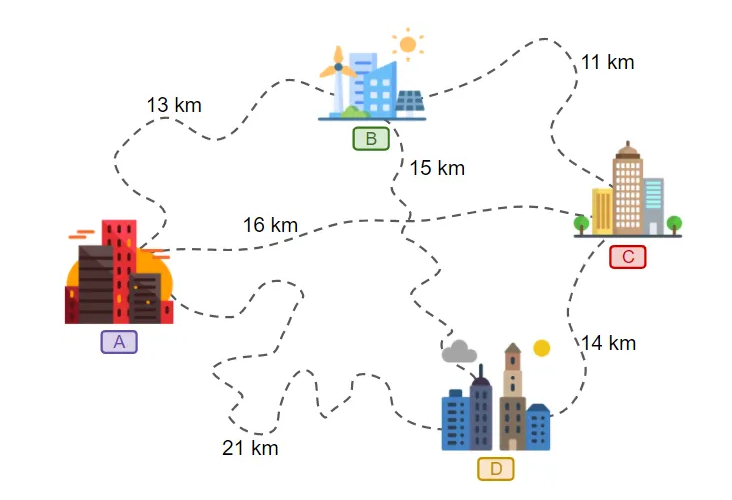


*   O conjunto dessas cidades pode ser representado como:

$$
C = \{c_1, c_2, ..., c_n\}
$$
 <br>
 * Cada cidade $c_i$ possui suas coordenadas $(x_i, y_i)$  e a distância entre duas cidades $c_i$ e $c_j$ pode ser representada por uma matriz de distâncias
$D$, onde:
$$D_{ij} = distância(c_i, c_j)$$
<br>
 * Desde que **seja possível ir diretamente de uma cidade para qualquer outra**, o grafo diz-se completo. Uma viagem que passe por todas as cidades corresponde a um **ciclo Hamiltoniano**, representado por um conjunto específico de linhas. A distância do ciclo é o somatório das distâncias das linhas presentes no mesmo.

### Função Objetivo
- A função objetivo busca minimizar a distância percorrida pelo caixeiro, que precisa visitar todas as cidades e retornar à cidade de origem ($c_1$):

$$
\text{Minimizar } Z = \sum_{i=1}^{n} \sum_{j=1}^{n} d_{ij} \cdot x_{ij}
$$
<br>

- $Z$ é a distância total percorrida.
- $d_{ij}$: Custo de se viajar entre as cidades $c_i$ e $c_j$ (nesse caso é a distância, pré-calculada com base nas coordenadas).
- **$x_{ij}$** é uma variável binária que indica se a aresta entre as cidades $i$ e $j$ é percorrida:
  - $x_{ij} = 1$ se a viagem de $i$ a $j$ for feita.
  - $x_{ij} = 0$ caso contrário.
- O somatório percorre todas as cidades $i$ e $j$.
<br>

## Distância Euclidiana

- Vamos utilizar a fórmula da distância Euclidiana para calcular a distância em linha reta entre duas cidades $c_i$ e $c_j$ com base em suas coordenadas:


$$
D_{ij} = \sqrt{(x_i - x_j)^2 + (y_i - y_j)^2}
$$
Onde:

- $D_{ij}$: Distância Euclidiana entre as cidades $c_i$ e $c_j$.
- $x_i$, $y_i$: Coordenadas da cidade $c_i$ no plano cartesiano.
- $x_j$, $y_j$: Coordenadas da cidade $c_j$ no plano cartesiano.


<br><br>
##  Exemplo Prático

### Passo 1: Definindo as Cidades e a Matriz de Distâncias

- Consideramos 4 cidades: **A, B, C, D**. A matriz de distâncias $c_{ij}$ entre as cidades é dada por:

|      | A  | B  | C  | D  |
|------|----|----|----|----|
| **A**| -  | 10 | 15 | 20 |
| **B**| 10 | -  | 35 | 25 |
| **C**| 15 | 35 | -  | 30 |
| **D**| 20 | 25 | 30 | -  |

<br>

- Aqui, temos $n = 4$, ou seja, 4 cidades.
- A matriz $c_{ij}$ é a tabela acima.
- Queremos encontrar um ciclo que passe por todas as cidades uma vez, com menor custo total.

<br><br>

### Passo 2: Calculando a Função Objetivo ($Z$)

- A função objetivo $Z$ representa a distância total percorrida, que é a soma das distâncias $c_{ij}$ para cada aresta $x_{ij}$ no ciclo. Suponha que a solução seja a seguinte: **A → B → D → C → A**.
- Nesse caso, as seguintes variáveis $x_{ij}$ assumem valor 1:
$$x_{AB}, x_{BD}, x_{DC}, x_{CA} $$
- A distância total $Z$ seria calculada da seguinte forma:

$$Z = c_{AB} \cdot x_{AB} + c_{BD} \cdot x_{BD}+ c_{DC} \cdot x_{DC}+ c_{CA} \cdot x_{CA} $$

<br>

- Substituindo os valores da tabela de distâncias:

$$Z = (10 \cdot 1) + (25 \cdot 1) + (30 \cdot 1) + (15 \cdot 1) = 80$$

<br><br>

### Passo 3: Conclusão

A solução **A → B → D → C → A** A representa um ciclo válido que passa por todas as cidades e retorna à origem. Portanto, o custo total $Z = 80$ é a solução ótima para esse exemplo.

# Espaço de Busca
Toda tarefa de busca e otimização envolve diversos componentes, incluindo o espaço de busca, que engloba todas as possíveis soluções de um problema, e a função de avaliação (ou função de custo), que permite avaliar a qualidade dessas soluções. Existem diferentes métodos de busca e funções de avaliação, cada um adequado a diferentes tipos de problemas.
O espaço de busca do Problema do Caixeiro Viajante (TSP) é o conjunto de **todas as possíveis rotas que o caixeiro pode percorrer**, onde cada rota é uma sequência de visitas a todas as cidades, começando e terminando na mesma cidade. Para n cidades, o número de soluções possíveis é dado por $(𝑛−1)!$, pois a **cidade inicial é fixada** e as $n−1$ cidades restantes podem ser permutadas.

# Complexidade


A complexidade do problema do caixeiro viajante é $O(n!)$, onde n é o número de nós, que, neste caso, representam as cidades. Existem inúmeras formas de organizar a sequência das cidades, o que justifica o uso do fatorial de $n (n!)$ para representar o total de possibilidades. Para cada uma dessas permutações, é necessário calcular o custo total do percurso. Assim, à medida que mais cidades são adicionadas ao problema, o tempo de execução aumenta drasticamente, pois o número de possibilidades cresce de forma exponencial.


# Codificação


A seguir, apresenta-se a codificação do algoritmo genético desenvolvido para a resolução de problemas de otimização baseados em permutações, como o Caixeiro Viajante. A implementação foi estruturada de forma modular, permitindo a seleção dinâmica dos operadores evolutivos e a fácil adaptação a diferentes cenários.


Este bloco inicializa o algoritmo com todos os parâmetros de configuração: coordenadas, operadores evolutivos, tamanho da população, número de gerações e taxas de crossover e mutação.

In [ ]:
import math
import random
from io import StringIO

class AlgoritmoGenetico:
    def __init__(self, coordenadas, selecao, cruzamento, mutacoes, tam_pop, geracoes, taxa_mutacao=0.01, taxa_crossover=0.7):
        self.coordenadas = coordenadas
        self.selecao = selecao.lower()
        self.cruzamento = cruzamento.lower()
        self.mutacoes = [m.lower() for m in mutacoes]
        self.tam_pop = tam_pop
        self.geracoes = geracoes
        self.taxa_mutacao = taxa_mutacao
        self.taxa_crossover = taxa_crossover
        self.n = len(coordenadas)

    def to_dict(self):
        return {
            'coordenadas': self.coordenadas,
            'selecao': self.selecao,
            'cruzamento': self.cruzamento,
            'mutacoes': self.mutacoes,
            'tam_pop': self.tam_pop,
            'geracoes': self.geracoes,
            'taxa_mutacao': self.taxa_mutacao,
            'taxa_crossover': self.taxa_crossover,
            'n': self.n
        }

A função ler_coordenadas_de_string(dados) serve para ler uma string contendo dados de coordenadas e convertê-la em uma lista de tuplas com valores float, representando os pontos que serão utilizados no problema de roteamento. A função distancia(p1, p2) calcula a distância euclidiana entre dois pontos bidimensionais, sendo usada para medir o custo entre dois locais. Já a função avaliar(individuo, ag) calcula o custo total de um percurso representado por um indivíduo (ou solução), somando todas as distâncias entre os pontos na ordem dada e incluindo o retorno ao ponto inicial, servindo como função de avaliação (ou fitness) no algoritmo genético.

In [ ]:
def ler_coordenadas_de_string(dados):
    coordenadas = []
    f = StringIO(dados)
    for linha in f:
        partes = linha.strip().split()
        if len(partes) == 3:
            _, x, y = partes
            coordenadas.append((float(x), float(y)))
    return coordenadas

def distancia(p1, p2):
    return math.dist(p1, p2)

def avaliar(individuo, ag):
    coordenadas = ag['coordenadas']
    custo = 0
    for i in range(len(individuo) - 1):
        custo += distancia(coordenadas[individuo[i]], coordenadas[individuo[i + 1]])
    custo += distancia(coordenadas[individuo[-1]], coordenadas[individuo[0]])
    return custo

# Seleção
Como métodos de seleção podemos usar torneio e classificação, onde utilizamos o torneio para garantir os melhores indivíduos e a classificação para manter a diversidade

* Seleção por Torneio: Este método permite ajustar a pressão seletiva de forma direta: valores maiores de k aumentam a chance de seleção dos melhores indivíduos, enquanto valores menores promovem maior diversidade.

* Seleção por Classificação: Já a seleção por classificação (ou ranking) adota uma abordagem distinta: todos os indivíduos são ordenados com base em seus valores de fitness, e a probabilidade de seleção é atribuída de acordo com essa ordenação, e não pelos valores absolutos de aptidão. Indivíduos com melhor ranking recebem maior probabilidade de seleção, mas todos ainda têm chance de serem escolhidos.

In [ ]:
def selecao(pop, fitness, ag):
    tipo = ag['selecao']
    if tipo == 'torneio':
        return torneio(pop, fitness)
    elif tipo == 'classificacao':
        return classificacao(pop, fitness)
    elif tipo == 'hibrido':
        return torneio(pop, fitness) if random.random() < 0.5 else classificacao(pop, fitness)
    else:
        raise ValueError("Tipo de seleção inválido.")

# Seleção por torneio

A seleção por torneio é uma técnica amplamente utilizada pela sua simplicidade e eficiência. Nesse método, são escolhidos aleatoriamente k indivíduos da população atual (neste caso, k = 3) e o indivíduo com a melhor avaliação de fitness dentro desse grupo é selecionado para a reprodução. Esse processo é repetido sempre que um novo pai precisa ser escolhido.

In [ ]:
def torneio(pop, fitness, k=3):
    selecionados = random.sample(list(zip(pop, fitness)), k)
    return min(selecionados, key=lambda x: x[1])[0]

# Seleção por classificação

Essa abordagem é vantajosa em contextos onde o fitness apresenta valores extremos, pois evita que um pequeno número de indivíduos com altíssimo desempenho dominem o processo evolutivo. Dessa forma, a seleção por classificação tende a preservar melhor a diversidade genética da população ao longo das gerações.

In [ ]:
def classificacao(pop, fitness):
    ordenados = sorted(zip(pop, fitness), key=lambda x: x[1])
    pesos = [1 / (i + 1) for i in range(len(ordenados))]
    total = sum(pesos)
    probs = [w / total for w in pesos]
    return random.choices([x[0] for x in ordenados], weights=probs)[0]

Após a seleção de individuos iremos passar para a etapa de cruzamento

# Cruzamento

Utilizamos Recombinação por arestas(ERX) e Order Crossover(OX) para mantermos soluções válidas em nossa população, já que queremos garantir as melhores rotas.

In [ ]:
def cruzamento(p1, p2, ag):
    tipo = ag['cruzamento']
    if tipo == 'pmx':
        return PMX(p1, p2)
    elif tipo == 'erx':
        return ERX(p1, p2)
    elif tipo == 'ox':
        return OX(p1, p2)
    elif tipo == 'hibrido':
        return PMX(p1, p2) if random.random() < 0.5 else ERX(p1, p2)
    else:
        raise ValueError("Tipo de cruzamento inválido.")

# Cruzamento por Order Crossover

O cruzamento OX preserva a ordem dos genes, garantindo que a sequência dos elementos seja mantida na maior parte possível.

In [ ]:
def OX(p1, p2):
    size = len(p1)
    a, b = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[a:b] = p1[a:b]

    pos = b
    for i in range(size):
        if p2[i] not in child:
            child[pos % size] = p2[i]
            pos += 1

    return child

# Cruzamento por recombinação de arestas

O ERX constroi um filho ao selecionar bordas presentes nos pais, priorizando conexões que preservem a estrutura da rota.

In [ ]:
def ERX(p1, p2):
    adj = {i: set() for i in p1}
    def add_edges(p):
        for i in range(len(p)):
            adj[p[i]].update([p[i - 1], p[(i + 1) % len(p)]])
    add_edges(p1)
    add_edges(p2)
    atual = random.choice(p1)
    filho = []
    while len(filho) < len(p1):
        filho.append(atual)
        vizinhos = [v for v in adj[atual] if v not in filho]
        if vizinhos:
            atual = min(vizinhos, key=lambda v: len(adj[v]))
        else:
            restantes = [v for v in p1 if v not in filho]
            if restantes:
                atual = random.choice(restantes)
    return filho

# Mutação
Iremos utilizar métodos simples como a mutação por troca e mutação por inversão, por troca conseguimos testar novas rotas e evitamos a permutação, evitando ficar preciso em máximos locais, a mutação por inversão nos ajuda a reorganizar as rotas, assim não perdemos rotas importantes.


In [ ]:
def mutacao(individuo, ag):
    tipos = ag['mutacoes']
    if isinstance(tipos, list):
        tipo = random.choice(tipos)
    else:
        tipo = tipos

    if tipo == 'swap':
        return swap(individuo)
    elif tipo == 'inversao':
        return inversao(individuo)
    elif tipo == 'hibrido':
        return swap(individuo) if random.random() < 0.5 else inversao(individuo)
    else:
        raise ValueError("Tipo de mutação inválido.")

# Mutação por troca

Na mutação por troca, dois genes (ou posições) distintas do indivíduo são selecionados aleatoriamente, e seus valores são simplesmente trocados entre si. Essa mutação é simples e eficiente, podendo alterar significativamente a ordem de visita de elementos.

In [ ]:
def swap(ind):
    p = ind.copy()
    a, b = random.sample(range(len(p)), 2)
    p[a], p[b] = p[b], p[a]
    return p

# Mutação por inversão

A mutação por inversão atua sobre uma subsequência do indivíduo. Dois pontos da permutação são escolhidos aleatoriamente e os elementos entre esses dois pontos são invertidos. Este operador costuma gerar mudanças mais estruturais do que a troca simples.

In [ ]:
def inversao(ind):
    p = ind.copy()
    a, b = sorted(random.sample(range(len(p)), 2))
    p[a:b] = list(reversed(p[a:b]))
    return p

# Estado da Arte

Cruzamento parcialmente mapeado: O PMX é um operador perfeito para o problema do caixeiro viajante, pois evita repetição de rotas e garante soluções válidas.

In [ ]:
def PMX(p1, p2):
    size = len(p1)
    a, b = sorted(random.sample(range(size), 2))
    child = [None] * size
    child[a:b] = p1[a:b]
    for i in range(a, b):
        if p2[i] not in child:
            val = p2[i]
            j = i
            while True:
                val2 = p1[j]
                j = p2.index(val2)
                if child[j] is None:
                    child[j] = val
                    break
    for i in range(size):
        if child[i] is None:
            child[i] = p2[i]
    return child

# Execução

Iniciamos as instancias com todas as cidades e instanciamos a classe do Algoritmo Genetico, onde escolhemos os operadores, tamanho da população e gerações.

In [ ]:
def algoritmo_genetico(ag):
    pop = [random.sample(range(ag['n']), ag['n']) for _ in range(ag['tam_pop'])]
    for _ in range(ag['geracoes']):
        fitness = [avaliar(ind, ag) for ind in pop]
        nova_pop = []
        for _ in range(ag['tam_pop']):
            p1 = selecao(pop, fitness, ag)
            p2 = selecao(pop, fitness, ag)
            filho = cruzamento(p1, p2, ag)
            if random.random() < ag['taxa_mutacao']:
                filho = mutacao(filho, ag)
            nova_pop.append(filho)
        pop = nova_pop
    fitness = [avaliar(ind, ag) for ind in pop]
    melhor_individuo = pop[fitness.index(min(fitness))]
    return melhor_individuo, min(fitness)

In [ ]:
eli51 = """
1 37.0 52.0
2 49.0 49.0
3 52.0 64.0
4 20.0 26.0
5 40.0 30.0
6 21.0 47.0
7 17.0 63.0
8 31.0 62.0
9 52.0 33.0
10 51.0 21.0
11 42.0 41.0
12 31.0 32.0
13 5.0 25.0
14 12.0 42.0
15 36.0 16.0
16 52.0 41.0
17 27.0 23.0
18 17.0 33.0
19 13.0 13.0
20 57.0 58.0
21 62.0 42.0
22 42.0 57.0
23 16.0 57.0
24 8.0 52.0
25 7.0 38.0
26 27.0 68.0
27 30.0 48.0
28 43.0 67.0
29 58.0 48.0
30 58.0 27.0
31 37.0 69.0
32 38.0 46.0
33 46.0 10.0
34 61.0 33.0
35 62.0 63.0
36 63.0 69.0
37 32.0 22.0
38 45.0 35.0
39 59.0 15.0
40 5.0 6.0
41 10.0 17.0
42 21.0 10.0
43 5.0 64.0
44 30.0 15.0
45 39.0 10.0
46 32.0 39.0
47 25.0 32.0
48 25.0 55.0
49 48.0 28.0
50 56.0 37.0
51 30.0 40.0
"""

coordenadas = ler_coordenadas_de_string(eli51)
ag = AlgoritmoGenetico(
    coordenadas,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())

melhor_rota_completa = melhor_individuo + [melhor_individuo[0]]
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [28, 20, 15, 49, 33, 29, 38, 32, 44, 43, 41, 18, 39, 40, 12, 3, 16, 36, 14, 9, 48, 8, 37, 4, 11, 46, 17, 24, 13, 23, 42, 6, 22, 5, 50, 45, 10, 31, 0, 26, 47, 7, 25, 30, 27, 2, 35, 34, 19, 21, 1, 28]
Custo total: 457.97


In [ ]:
berlin52 = """
1 565.0 575.0
2 25.0 185.0
3 345.0 750.0
4 945.0 685.0
5 845.0 655.0
6 880.0 660.0
7 25.0 230.0
8 525.0 1000.0
9 580.0 1175.0
10 650.0 1130.0
11 1605.0 620.0
12 1220.0 580.0
13 1465.0 200.0
14 1530.0 5.0
15 845.0 680.0
16 725.0 370.0
17 145.0 665.0
18 415.0 635.0
19 510.0 875.0
20 560.0 365.0
21 300.0 465.0
22 520.0 585.0
23 480.0 415.0
24 835.0 625.0
25 975.0 580.0
26 1215.0 245.0
27 1320.0 315.0
28 1250.0 400.0
29 660.0 180.0
30 410.0 250.0
31 420.0 555.0
32 575.0 665.0
33 1150.0 1160.0
34 700.0 580.0
35 685.0 595.0
36 685.0 610.0
37 770.0 610.0
38 795.0 645.0
39 720.0 635.0
40 760.0 650.0
41 475.0 960.0
42 95.0 260.0
43 875.0 920.0
44 700.0 500.0
45 555.0 815.0
46 830.0 485.0
47 1170.0 65.0
48 830.0 610.0
49 605.0 625.0
50 595.0 360.0
51 1340.0 725.0
52 1740.0 245.0
"""

coordenadas = ler_coordenadas_de_string(berlin52)
ag = AlgoritmoGenetico(
    coordenadas,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())

melhor_rota_completa = melhor_individuo + [melhor_individuo[0]]
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [48, 0, 21, 31, 44, 18, 40, 7, 8, 9, 32, 42, 3, 5, 14, 4, 37, 39, 38, 36, 47, 23, 24, 11, 50, 10, 51, 13, 12, 26, 27, 25, 46, 45, 15, 28, 29, 1, 6, 41, 16, 2, 17, 30, 20, 22, 19, 49, 43, 33, 34, 35, 48]
Custo total: 8138.35


In [ ]:
rat99 = """
1 6.0 4.0
2 15.0 15.0
3 24.0 18.0
4 33.0 12.0
5 48.0 12.0
6 57.0 14.0
7 67.0 10.0
8 77.0 10.0
9 86.0 15.0
10 6.0 21.0
11 17.0 26.0
12 23.0 25.0
13 32.0 35.0
14 43.0 23.0
15 55.0 35.0
16 65.0 36.0
17 78.0 39.0
18 87.0 35.0
19 3.0 53.0
20 12.0 44.0
21 28.0 53.0
22 33.0 49.0
23 47.0 46.0
24 55.0 52.0
25 64.0 50.0
26 71.0 57.0
27 87.0 57.0
28 4.0 72.0
29 15.0 78.0
30 22.0 70.0
31 34.0 71.0
32 42.0 79.0
33 54.0 77.0
34 66.0 79.0
35 78.0 67.0
36 87.0 73.0
37 7.0 81.0
38 17.0 95.0
39 26.0 98.0
40 32.0 97.0
41 43.0 88.0
42 57.0 89.0
43 64.0 85.0
44 78.0 83.0
45 83.0 98.0
46 5.0 109.0
47 13.0 111.0
48 25.0 102.0
49 38.0 119.0
50 46.0 107.0
51 58.0 110.0
52 67.0 110.0
53 74.0 113.0
54 88.0 110.0
55 2.0 124.0
56 17.0 134.0
57 23.0 129.0
58 36.0 131.0
59 42.0 137.0
60 53.0 123.0
61 63.0 135.0
62 72.0 134.0
63 87.0 129.0
64 2.0 146.0
65 16.0 147.0
66 25.0 153.0
67 38.0 155.0
68 42.0 158.0
69 57.0 154.0
70 66.0 151.0
71 73.0 151.0
72 86.0 149.0
73 5.0 177.0
74 13.0 162.0
75 25.0 169.0
76 35.0 177.0
77 46.0 172.0
78 54.0 166.0
79 65.0 174.0
80 73.0 161.0
81 86.0 162.0
82 2.0 195.0
83 14.0 196.0
84 28.0 189.0
85 38.0 187.0
86 46.0 195.0
87 57.0 194.0
88 63.0 188.0
89 77.0 193.0
90 85.0 194.0
91 8.0 211.0
92 12.0 217.0
93 22.0 210.0
94 34.0 216.0
95 47.0 203.0
96 58.0 213.0
97 66.0 206.0
98 78.0 210.0
99 85.0 204.0
"""

coordenadas = ler_coordenadas_de_string(rat99)
ag = AlgoritmoGenetico(
    coordenadas,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())

melhor_rota_completa = melhor_individuo + [melhor_individuo[0]]
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [46, 45, 54, 63, 65, 55, 56, 48, 49, 59, 57, 58, 66, 67, 64, 73, 74, 72, 81, 90, 91, 93, 92, 82, 83, 75, 84, 85, 94, 95, 96, 97, 98, 89, 88, 86, 87, 79, 80, 78, 76, 77, 68, 69, 70, 71, 62, 60, 61, 53, 44, 52, 51, 50, 42, 41, 32, 30, 20, 21, 22, 23, 15, 14, 24, 25, 33, 43, 35, 34, 26, 17, 16, 8, 7, 6, 4, 5, 13, 3, 2, 1, 0, 9, 10, 11, 12, 19, 18, 27, 36, 37, 28, 29, 31, 40, 39, 38, 47, 46]
Custo total: 1436.82


In [ ]:
pr152 = """
1 2100.0 1850.0
2 2100.0 3000.0
3 2100.0 4400.0
4 2100.0 5550.0
5 2100.0 6950.0
6 2100.0 8100.0
7 2100.0 9500.0
8 2100.0 10650.0
9 2348.0 11205.0
10 2350.0 10050.0
11 2348.0 8655.0
12 2350.0 7500.0
13 2348.0 6105.0
14 2350.0 4950.0
15 2348.0 3555.0
16 2350.0 2400.0
17 2625.0 11175.0
18 2775.0 10995.0
19 2625.0 10025.0
20 2634.0 9748.0
21 2607.0 9831.0
22 2625.0 8625.0
23 2775.0 8445.0
24 2625.0 7475.0
25 2607.0 7281.0
26 2634.0 7198.0
27 2625.0 6075.0
28 2775.0 5895.0
29 2625.0 4925.0
30 2607.0 4731.0
31 2634.0 4648.0
32 2625.0 3525.0
33 2775.0 3345.0
34 2625.0 2375.0
35 2634.0 2098.0
36 2607.0 2181.0
37 2825.0 3025.0
38 2825.0 5575.0
39 2825.0 8125.0
40 2825.0 10675.0
41 8349.0 10106.0
42 8353.0 9397.0
43 8349.0 7556.0
44 8353.0 6847.0
45 8349.0 5006.0
46 8353.0 4297.0
47 8349.0 2456.0
48 8353.0 1747.0
49 8474.0 1777.0
50 8576.0 1803.0
51 8575.0 2325.0
52 8474.0 4327.0
53 8576.0 4353.0
54 8575.0 4875.0
55 8474.0 6877.0
56 8576.0 6903.0
57 8575.0 7425.0
58 8474.0 9427.0
59 8576.0 9453.0
60 8575.0 9975.0
61 8625.0 9875.0
62 8675.0 9675.0
63 8675.0 9525.0
64 8669.0 9450.0
65 8625.0 7325.0
66 8675.0 7125.0
67 8675.0 6975.0
68 8669.0 6900.0
69 8625.0 4775.0
70 8675.0 4575.0
71 8675.0 4425.0
72 8669.0 4350.0
73 8625.0 2225.0
74 8675.0 1875.0
75 8675.0 2025.0
76 8669.0 1800.0
77 9250.0 1850.0
78 9250.0 3000.0
79 9250.0 4400.0
80 9250.0 5550.0
81 9250.0 6950.0
82 9250.0 8100.0
83 9250.0 9500.0
84 9250.0 10650.0
85 9498.0 11205.0
86 9500.0 10050.0
87 9498.0 8655.0
88 9500.0 7500.0
89 9498.0 6105.0
90 9500.0 4950.0
91 9498.0 3555.0
92 9500.0 2400.0
93 9784.0 2098.0
94 9757.0 2181.0
95 9775.0 2375.0
96 9775.0 3525.0
97 9784.0 4648.0
98 9757.0 4731.0
99 9775.0 4925.0
100 9775.0 6075.0
101 9784.0 7198.0
102 9757.0 7281.0
103 9775.0 7475.0
104 9775.0 8625.0
105 9784.0 9748.0
106 9757.0 9831.0
107 9775.0 10025.0
108 9775.0 11175.0
109 9925.0 10995.0
110 9975.0 10675.0
111 9925.0 8445.0
112 9975.0 8125.0
113 9925.0 5895.0
114 9975.0 5575.0
115 9925.0 3345.0
116 9975.0 3025.0
117 15499.0 10106.0
118 15503.0 9397.0
119 15499.0 7556.0
120 15503.0 6847.0
121 15499.0 5006.0
122 15503.0 4297.0
123 15499.0 2456.0
124 15503.0 1747.0
125 15624.0 1777.0
126 15726.0 1803.0
127 15775.0 2225.0
128 15725.0 2325.0
129 15624.0 4327.0
130 15726.0 4353.0
131 15775.0 4775.0
132 15725.0 4875.0
133 15624.0 6877.0
134 15726.0 6903.0
135 15775.0 7325.0
136 15725.0 7425.0
137 15624.0 9427.0
138 15726.0 9453.0
139 15775.0 9875.0
140 15725.0 9975.0
141 15825.0 9675.0
142 15825.0 9525.0
143 15819.0 9450.0
144 15825.0 7125.0
145 15825.0 6975.0
146 15819.0 6900.0
147 15825.0 4575.0
148 15825.0 4425.0
149 15819.0 4350.0
150 15825.0 1875.0
151 15825.0 2025.0
152 15819.0 1800.0
"""

coordenadas = ler_coordenadas_de_string(pr152)
ag = AlgoritmoGenetico(
    coordenadas,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())

melhor_rota_completa = melhor_individuo + [melhor_individuo[0]]
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [123, 150, 151, 149, 125, 124, 122, 91, 92, 76, 90, 114, 115, 95, 96, 97, 44, 53, 68, 69, 78, 89, 98, 45, 51, 71, 70, 52, 50, 47, 49, 48, 75, 74, 73, 72, 93, 94, 77, 46, 32, 0, 35, 1, 34, 33, 36, 15, 31, 14, 13, 29, 28, 37, 12, 3, 2, 30, 27, 26, 25, 24, 57, 41, 17, 8, 16, 39, 20, 19, 10, 21, 22, 5, 23, 4, 11, 38, 6, 9, 7, 18, 61, 62, 60, 59, 82, 85, 83, 40, 63, 58, 105, 104, 106, 108, 107, 84, 109, 116, 138, 139, 142, 137, 141, 136, 140, 145, 133, 118, 117, 134, 143, 144, 135, 132, 119, 112, 113, 79, 54, 67, 66, 55, 87, 81, 86, 103, 110, 111, 102, 101, 43, 56, 64, 42, 65, 80, 100, 99, 88, 120, 130, 131, 146, 147, 148, 129, 121, 128, 127, 126, 123]
Custo total: 129814.44


In [ ]:
#Pegando todos coordenadas

coordenadas_eli51 = ler_coordenadas_de_string(eli51)
coordenadas_berlin52 = ler_coordenadas_de_string(berlin52)
coordenadas_rat99 = ler_coordenadas_de_string(rat99)
coordenadas_pr152 = ler_coordenadas_de_string(pr152)


In [ ]:
#Testes eli51 (Sem inversão)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_eli51,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["swap"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [123, 150, 151, 149, 125, 124, 122, 91, 92, 76, 90, 114, 115, 95, 96, 97, 44, 53, 68, 69, 78, 89, 98, 45, 51, 71, 70, 52, 50, 47, 49, 48, 75, 74, 73, 72, 93, 94, 77, 46, 32, 0, 35, 1, 34, 33, 36, 15, 31, 14, 13, 29, 28, 37, 12, 3, 2, 30, 27, 26, 25, 24, 57, 41, 17, 8, 16, 39, 20, 19, 10, 21, 22, 5, 23, 4, 11, 38, 6, 9, 7, 18, 61, 62, 60, 59, 82, 85, 83, 40, 63, 58, 105, 104, 106, 108, 107, 84, 109, 116, 138, 139, 142, 137, 141, 136, 140, 145, 133, 118, 117, 134, 143, 144, 135, 132, 119, 112, 113, 79, 54, 67, 66, 55, 87, 81, 86, 103, 110, 111, 102, 101, 43, 56, 64, 42, 65, 80, 100, 99, 88, 120, 130, 131, 146, 147, 148, 129, 121, 128, 127, 126, 123]
Custo total: 460.16


In [ ]:
#Testes eli51 (Sem swap)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_eli51,
    selecao='hibrido',
    cruzamento='hibrido',
    mutacoes=["inversao"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [123, 150, 151, 149, 125, 124, 122, 91, 92, 76, 90, 114, 115, 95, 96, 97, 44, 53, 68, 69, 78, 89, 98, 45, 51, 71, 70, 52, 50, 47, 49, 48, 75, 74, 73, 72, 93, 94, 77, 46, 32, 0, 35, 1, 34, 33, 36, 15, 31, 14, 13, 29, 28, 37, 12, 3, 2, 30, 27, 26, 25, 24, 57, 41, 17, 8, 16, 39, 20, 19, 10, 21, 22, 5, 23, 4, 11, 38, 6, 9, 7, 18, 61, 62, 60, 59, 82, 85, 83, 40, 63, 58, 105, 104, 106, 108, 107, 84, 109, 116, 138, 139, 142, 137, 141, 136, 140, 145, 133, 118, 117, 134, 143, 144, 135, 132, 119, 112, 113, 79, 54, 67, 66, 55, 87, 81, 86, 103, 110, 111, 102, 101, 43, 56, 64, 42, 65, 80, 100, 99, 88, 120, 130, 131, 146, 147, 148, 129, 121, 128, 127, 126, 123]
Custo total: 444.8


In [ ]:
#Testes berlin52(Sem inversão)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_berlin52,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["swap"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 8076.29


In [ ]:
#Testes berlin52 (Sem swap)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_berlin52,
    selecao='hibrido',
    cruzamento='hibrido',
    mutacoes=["inversao"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 7777.33


In [ ]:
#Testes rat99(Sem inversão)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_rat99,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["swap"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 1493.53


In [ ]:
#Testes rat99 (Sem swap)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_rat99,
    selecao='hibrido',
    cruzamento='hibrido',
    mutacoes=["inversao"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 1467.56


In [ ]:
#Testes pr152(Sem inversão)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_pr152,
    selecao="hibrido",
    cruzamento="hibrido",
    mutacoes=["swap"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 105318.85


In [ ]:
#Testes pr152 (Sem swap)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_pr152,
    selecao='hibrido',
    cruzamento='hibrido',
    mutacoes=["inversao"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 113232.33


In [ ]:
#Testes eli51 (Somente operador de torneio)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_eli51,
    selecao="torneio",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 906.34


In [ ]:
#Testes berlin52 (Somente operador de torneio)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_berlin52,
    selecao="torneio",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 11988.78


In [ ]:
#Testes rat99 (Somente operador de torneio)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_rat99,
    selecao="torneio",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 4254.21


In [ ]:
#Testes pr152 (Somente operador de torneio)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_pr152,
    selecao="torneio",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 568330.52


In [ ]:
#Testes eli51 (Somente operador de classificação)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_eli51,
    selecao="classificacao",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 461.81


In [ ]:
#Testes berlin52 (Somente operador de classificação)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_berlin52,
    selecao="classificacao",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 7849.4


In [ ]:
#Testes rat99 (Somente operador de classificação)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_rat99,
    selecao="classificacao",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 1519.91


In [ ]:
#Testes pr152 (Somente operador de classificação)

ag = AlgoritmoGenetico(
    coordenadas=coordenadas_pr152,
    selecao="classificacao",
    cruzamento="hibrido",
    mutacoes=["hibrido"],
    tam_pop=100,
    geracoes=1000
)
melhor_individuo, custo_total = algoritmo_genetico(ag.to_dict())
print(f"Melhor solução: {melhor_rota_completa}")
print(f"Custo total: {round(custo_total, 2)}")

Melhor solução: [22, 24, 25, 12, 3, 27, 26, 37, 4, 5, 11, 23, 32, 31, 15, 0, 34, 35, 33, 36, 1, 14, 30, 2, 13, 29, 28, 46, 77, 92, 93, 72, 50, 74, 47, 49, 48, 73, 75, 76, 91, 94, 115, 114, 97, 68, 45, 70, 71, 52, 78, 90, 95, 96, 113, 51, 69, 53, 44, 67, 65, 66, 64, 56, 80, 88, 99, 100, 101, 87, 102, 111, 110, 103, 86, 81, 42, 43, 54, 55, 79, 112, 89, 98, 128, 121, 127, 151, 123, 122, 149, 126, 125, 124, 150, 148, 147, 146, 130, 129, 120, 145, 143, 131, 119, 133, 144, 132, 134, 118, 135, 117, 136, 137, 140, 141, 142, 116, 139, 138, 106, 85, 105, 104, 82, 62, 58, 63, 61, 83, 108, 109, 107, 84, 60, 40, 59, 41, 57, 16, 8, 7, 9, 18, 20, 19, 6, 17, 39, 10, 21, 38, 22]
Custo total: 112475.88


# Gráficos de alguns testes realizados
* Rat99
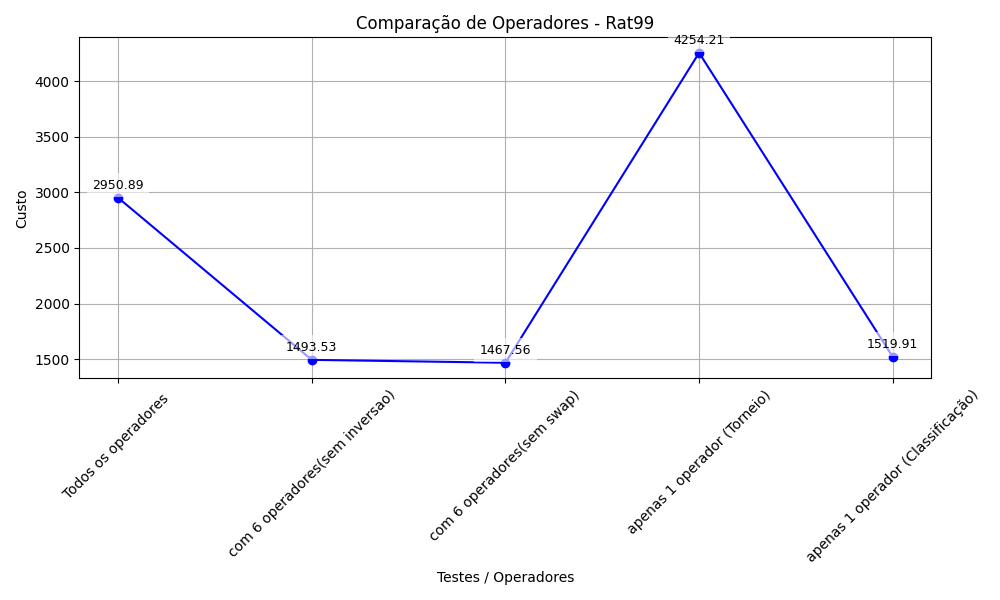

* Berlin52
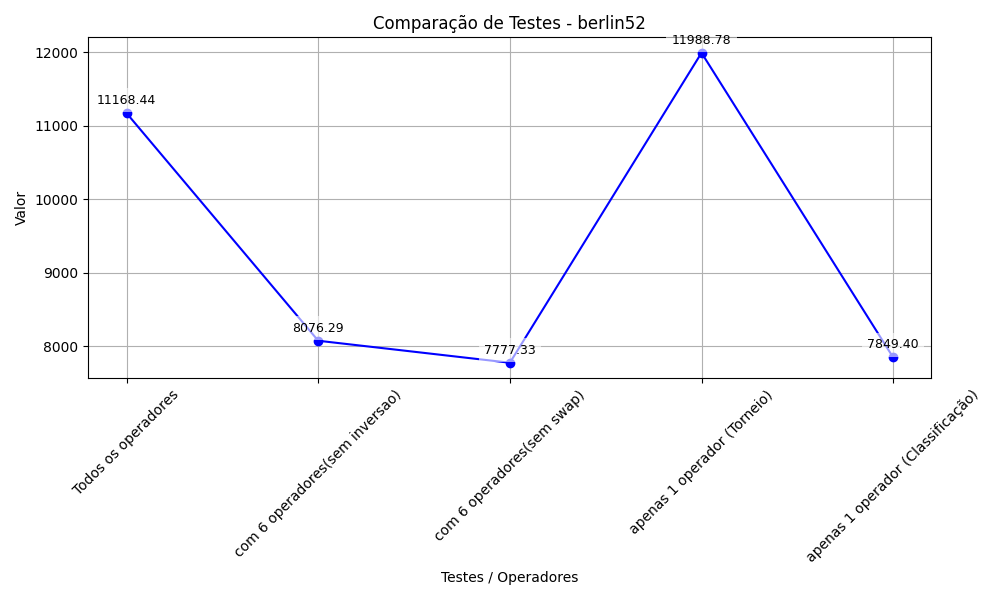

* eli51
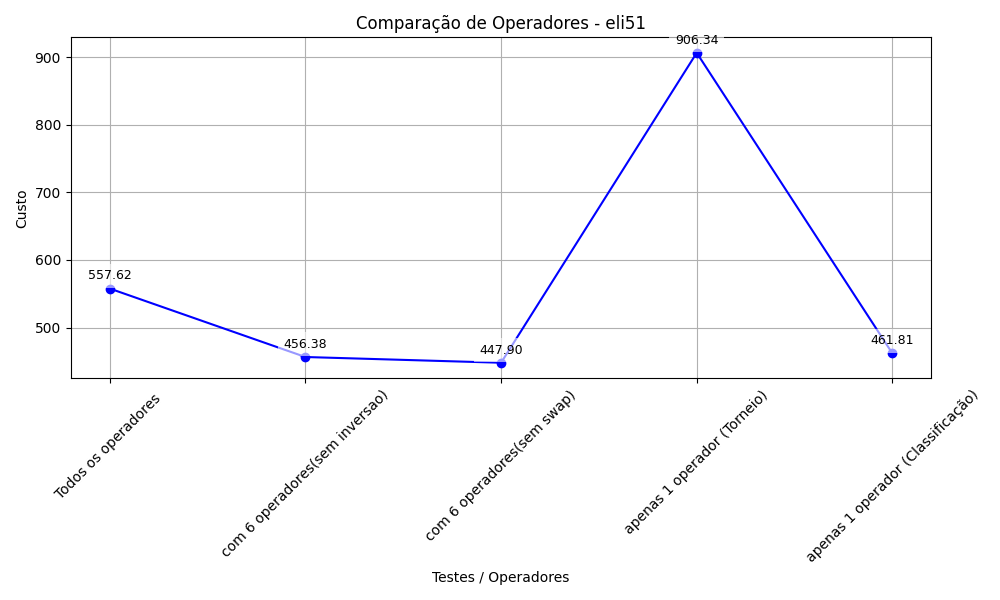51
* pr152
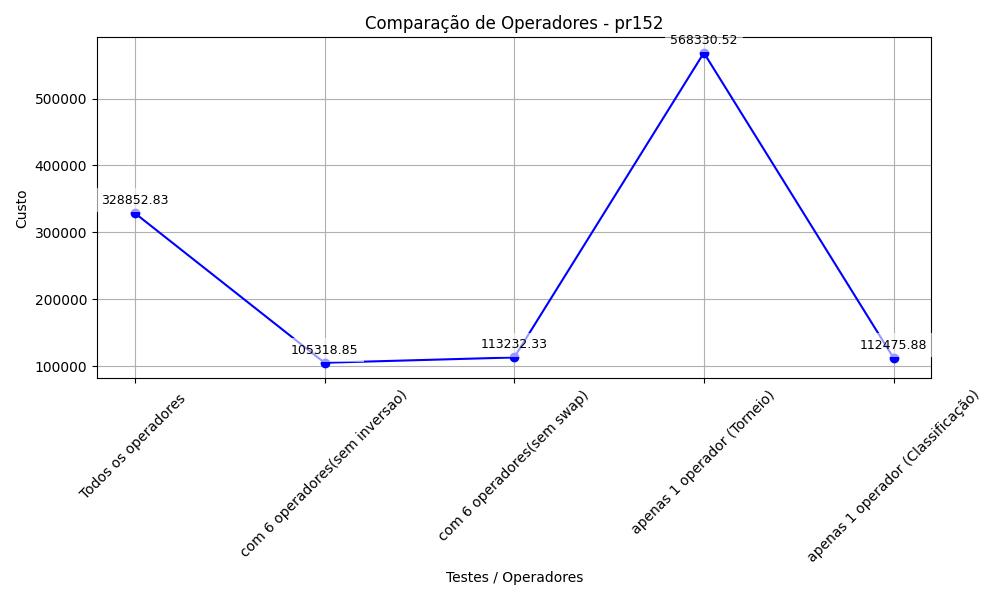

Durante a análise dos testes, observamos que a configuração utilizando os 6 operadores, porém sem o operador de swap, apresentou o melhor custo, resultando na solução de maior qualidade. Para garantir a robustez dos resultados e reduzir a influência de variabilidades aleatórias, foram realizadas 10 rodadas para cada teste. Esses achados sugerem que, ao remover o operador de swap, o algoritmo convergiu de forma mais consistente para soluções de menor custo, evidenciando uma estratégia vantajosa para esse contexto específico.

# Referências

**Problema do caixeiro viajante**. Disponível em: https://www.inf.ufpr.br/marcos/ci242/aula4.pdf. Acesso em: 14 abr. 2025.

UFPR, Departamento de Engenharia de Produção. **Problema do Caixeiro Viajante**. Disponível em: https://docs.ufpr.br/~volmir/PO_II_12_TSP.pdf. Acesso em: 14 abr. 2025.

QUEIROZ, Thiago Alves de. **Otimização Combinatória - Parte 3**. Disponível em: https://files.cercomp.ufg.br/weby/up/601/o/aula3-OC.pdf. Acesso em: 14 abr. 2025.

AZEVEDO, Caroline Sales de; MALDONADO, Michelli. **Análise das restrições de eliminação de sub-rotas do tipo fluxo de commodities para o problema do caixeiro viajante assimétrico**. Recebimento dos originais: 07 mai. 2021. Aceitação para publicação: 01 jun. 2021. Disponível em: https://ojs.brazilianjournals.com.br/ojs/index.php/BRJD/article/download/31839/pdf/81450. Acesso em: 14 abr. 2025.

OUYANG, Quan; XU, Hongyun. **The study of comparisons of three crossover operators in genetic algorithm for solving single machine scheduling problem**. School of Mathematics & Computer Science, JiangHan University, China. Disponível em: https://www.atlantis-press.com/article/25845582.pdf. Acesso em: 21 abr. 2025.

Helmy, M. (2024, March 18). Partially Mapped Crossover in Genetic Algorithms. Baeldung. Retrieved April 21, 2025, from https://www.baeldung.com/cs/ga-pmx-operator​

Whitley, Darrell; Thimothy Starkweather, D'Ann Fuquay (1989). "Problemas de escalonamento e caixeiro-viajante: O operador de recombinação de arestas genéticas". Conferência Internacional sobre Algoritmos Genéticos : 133-140.